# Coding Temple's Data Analytics Program
---
## Python for Data Analytics: Stats Assignment

For today's homework, you will be working with AB Testing Dataset. This data was scraped from a study conducted by Udemy. The study was to determine if there was a relationship with the number of clickthroughs and webtext that was displayed. 

Your goal is to analyze the data that was collected during this study and determine whether or not there is a relationship between the two variables.

### Task 1: Imports
Import your data and your libraries needed to complete this assignment:

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
import numpy as np
from scipy.stats import chi2_contingency

### Task 2: Creating Hypothesis

Before you begin working with the data, formulate your null and alternative hypothesis in the markdown cell below:

Ho: -- (Null Hypothesis): There is not a relationship between webtext and clickthroughs
Ha: -- (Alternative Hypothese): There is a relationship between webtext and clickthroughs

### Task 3: Calculating Frequencies

In this task, you will calculate your frequency and your relative frequency of the `group` column

In [24]:
# Reading in data
data_url = r'c:\Users\jjs61\OneDrive\Desktop\Data Analytics\Coding_Temple\week_4\ab_testing(1).csv'


df = pd.read_csv(data_url, skipinitialspace=True, header=0)
# verifying dataset size (rows and columns)
print(df.shape)

# Formatting labels to pythonic structure
df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()

df.head(10)

# Verifying Null count
df.isnull().sum().sum()
df.head()

# Dropping unnamed column
df = df.drop(columns='unnamed:_0')
df.head()



(690203, 4)


,pageview,group,click
0,0,Control,1
1,1,Control,1
2,2,Control,1
3,3,Control,1
4,4,Control,1


In [55]:
df.describe()

,pageview,click
count,690203.000000,690203.000000
mean,172550.532413,0.082154
std,99622.783282,0.274600
min,0.000000,0.000000
25%,86275.000000,0.000000
50%,172550.000000,0.000000
75%,258825.500000,0.000000
max,345542.000000,1.000000


Next, let's calculate the frequency and relative frequency of the `click` column:

In [28]:
# Frequency Calculation
click_count_freq = df['click'].value_counts()
click_count_freq


click
0    633500
1     56703
Name: count, dtype: int64

In [31]:
# Relative Frequency Calculation of 0 and 1
click_count_rate = round(df['click'].value_counts(normalize=True)*100,2)
click_count_rate

click
0    91.78
1     8.22
Name: proportion, dtype: float64

### Task 4a: 

Look at the joint distribution of the `group` and `click` columns and make an inference on if there is a relationship between the group and clicks

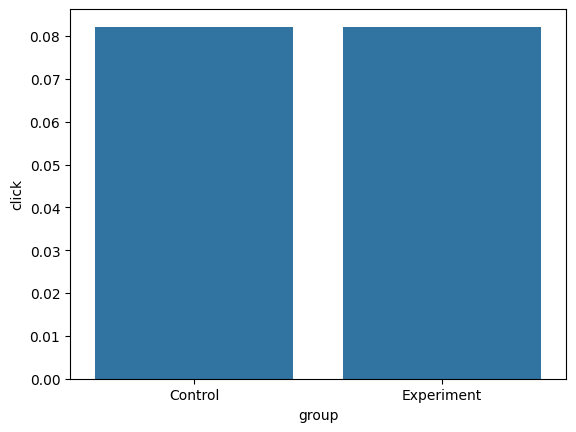

In [48]:
sns.barplot(data=df, y= 'click', x='group', errorbar = None);

In [41]:
# Using crosstab function to determine the relationship between the group and clicks
combined_joint_dist = pd.crosstab(df['click'], df['group'])
display(combined_joint_dist)


group,Control,Experiment
click,,
0,317165,316335
1,28378,28325


When exmaining the joint distribution between group and clicks, 
it looks as if webtext features do not provide a positive impact for clicks.
In addition, it looks as if they could possibly negatively impact clicks. 

### Task 4b:

Calculate the marginal distribution of the `group` and `click` variables:

In [43]:
marginal_dist = pd.crosstab(df['click'], df['group'], margins=True)
marginal_dist

group,Control,Experiment,All
click,,,
0,317165,316335,633500
1,28378,28325,56703
All,345543,344660,690203


### Task 4c:
Calculate the conditional distribution of the `group` and `click` variables:

In [44]:
# Using the normalize argument to compute the proprtions of each variable row
round(pd.crosstab(df['click'], df['group'], normalize=True)*100, 1)

group,Control,Experiment
click,,
0,46.0,45.8
1,4.1,4.1


### Task 5:

Perform a chi-squared test on your data. Interpret and communicate the results in a markdown cell below your code

If p-value < 0.05 reject the null hypothesis
If p-value > 0.05 failt to reject the null hypothesis

In [54]:
sta, p_val, dof, exp_freq = chi2_contingency(pd.crosstab(df['group'], df['click']))

print(p_val)


0.9352212452988706
0.006606036478633042
1
[[317155.22896887  28387.77103113]
 [316344.77103113  28315.22896887]]


The p-value (0.93522) is > 0.05 
We will fail to reject (accept) the null hypothesis, 
and can conclude we cannot correlate webtexts and clickthroughs

